In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *
import pandas as pd
import seaborn as sns
import io #Used as buffer

In [2]:
nn_p = 5
nn_w = 5
nn_tw = 1
freq = 0.5
m='mof'

df = get_data(m, krus=True)
df = df[(df['nnw']==str(nn_w))&(df['nntw']==str(nn_tw))&(df['nnp']==str(nn_p))|(df['isnn']==False)] 

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [3]:
df=df.query(f'freq>{freq} and freq<{20}')

In [4]:
remove_method = ['noNN_No', 'noNN_CwN','NN_CwN']
df = df[~df.method.isin(remove_method)]

# Functions

In [5]:
col_by_freq = True
col_palette = 'Set3'

def plot_one(data, m, normalize=False, title='', title_size=14, col_by_freq=col_by_freq, col_palette=col_palette,
             legend=False, hide_x=True, hide_y=True, ax=None, do_lim=True, ll=0.2, ul=0.8):
#     m = m.upper()
    if normalize: m = m + '_norm' 
    if ax is None: fig,ax = plt.subplots(1,1,figsize=(6,4))
    sns.boxplot('method' if col_by_freq else 'freq', m, hue='freq' if col_by_freq else 'method',
                data=data, palette=col_palette,
                # width=2.5,
                linewidth=0.5, fliersize=0, ax=ax)
    if not legend: ax.get_legend().remove()
    if do_lim:
        ax.set_ylim(-0.05,1.05)
    else:
        g = data.groupby(['method','freq'])[m]
        q1,q3 = g.quantile(ll),g.quantile(ul)
        iqr = q3-q1
        lower_lim = (q1 - 1.5*iqr).min()
        upper_lim = (q3 + 1.5*iqr).max()
        lower_lim = data[m][data[m]>=lower_lim].min()
        upper_lim = data[m][data[m]<=upper_lim].max()
        ax.set_ylim(lower_lim,upper_lim)
        
    ax.set_xlabel('')
    if hide_x: ax.set_xticklabels([])
    if hide_y: ax.set_ylabel('')
    ax.set_title(title, size=title_size)
    return ax

def plot_all_vertical(m, normalize=False, title_size=14, col_by_freq=col_by_freq, col_palette=col_palette, do_lim=True,
                      ll=0.2, ul=0.8):
    data =df
#     data = get_data(m, normalize=normalize)
#     fig,axss = plt.subplots(4, 3, figsize=(14,16), sharex=do_lim, sharey=do_lim)
    fig,axss = plt.subplots(4, 3, figsize=(24,16), sharex=False, sharey=False)
    for i,(axs,exp) in enumerate(zip(axss,['exp1','exp2','exp3','exp4'])):
        first_exp = i==0
        for j,(ax,func) in enumerate(zip(axs,['sphere', 'rosenbrock', 'rastrigin'])):
            first_func = j==0
            test = data.query(f'experiment=={exp!r} and function=={func!r}').sort_values('method', ascending=False)
            plot_one(test, m, normalize=normalize, title=f'{exp}-{func.title()}', title_size=title_size, hide_x=False,
                     hide_y=not first_func, col_by_freq=col_by_freq, col_palette=col_palette, ax=ax,
                     do_lim=do_lim, ll=ll, ul=ul)
        ax.legend(loc='upper left', ncol=3)
    plt.tight_layout()
    return fig,axss

def plot_all_horizontal(m, normalize=False, title_size=14, col_by_freq=col_by_freq, col_palette=col_palette, do_lim=True,
                        ll=0.2, ul=0.8):
    data = get_data(m, normalize=normalize)
#     fig,axss = plt.subplots(4, 3, figsize=(14,16), sharex=do_lim, sharey=do_lim)
    fig,axss = plt.subplots(3, 4, figsize=(28,20), sharex=False, sharey=False)#20,12
    for i,exp in enumerate(['exp1','exp2','exp3','exp4']):#
        first_exp = i==0
        axs = axss[:,i]
        for j,(ax,func) in enumerate(zip(axs,['sphere', 'rosenbrock', 'rastrigin'])):
            first_func = i==0
            test = data.query(f'experiment=={exp!r} and function=={func!r}').sort_values('method', ascending=False)
            plot_one(test, m, normalize=normalize, title=f'{exp}-{func.title()}', title_size=title_size, hide_x=False,
                     hide_y=not first_func, col_by_freq=col_by_freq, col_palette=col_palette, ax=ax,
                     do_lim=do_lim, ll=ll, ul=ul)
        
    for axs in axss: axs[-1].legend(loc='upper right', ncol=3)
    plt.tight_layout()
    return fig,axss

# Plots

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


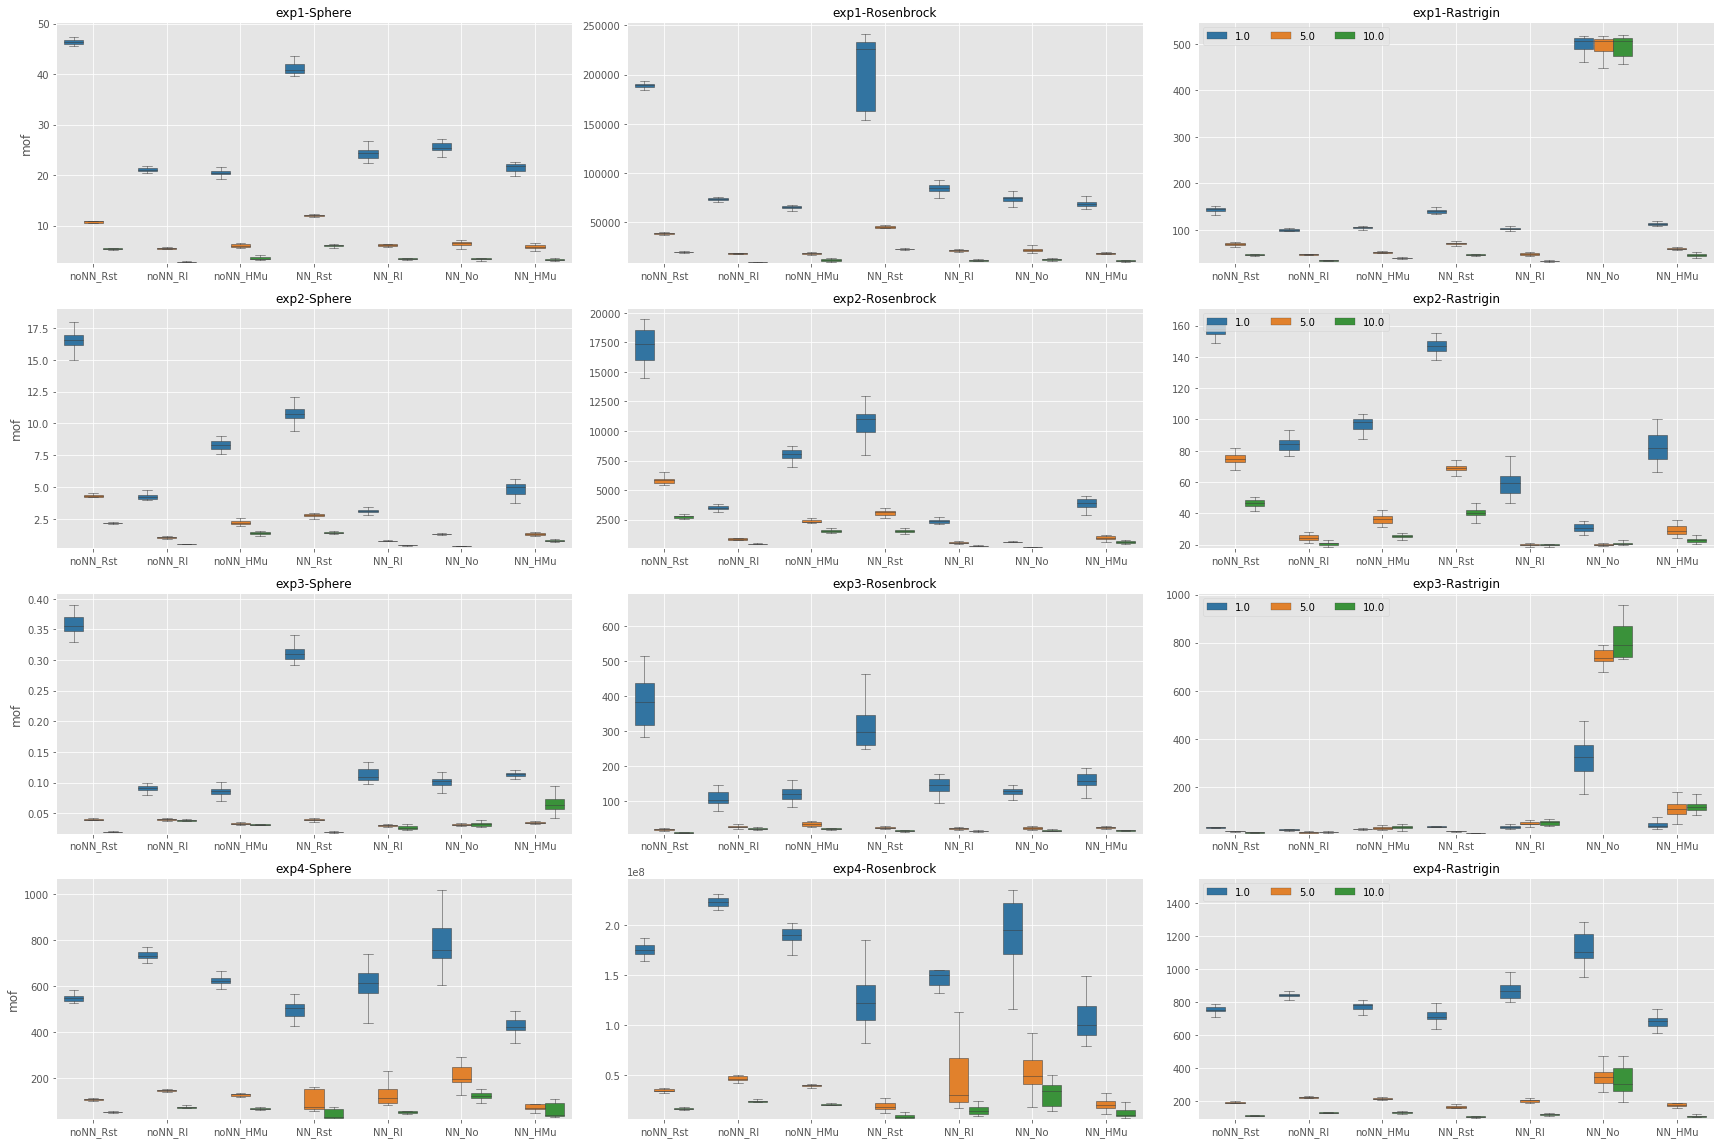

In [6]:
with plt.style.context('ggplot'):
    fig,axs = plot_all_vertical('mof', title_size=12, col_by_freq=True, col_palette='tab10', do_lim=False, ll=0.2, ul=0.8)
    for ax in axs.flatten():
        ll,ul = ax.get_ylim()
        ax.set_ylim(ll*0.95, ul*1.05)
        ax.grid(True)
    
fig.savefig(PATH_RESULTS/'MOF.eps', dpi=800, format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


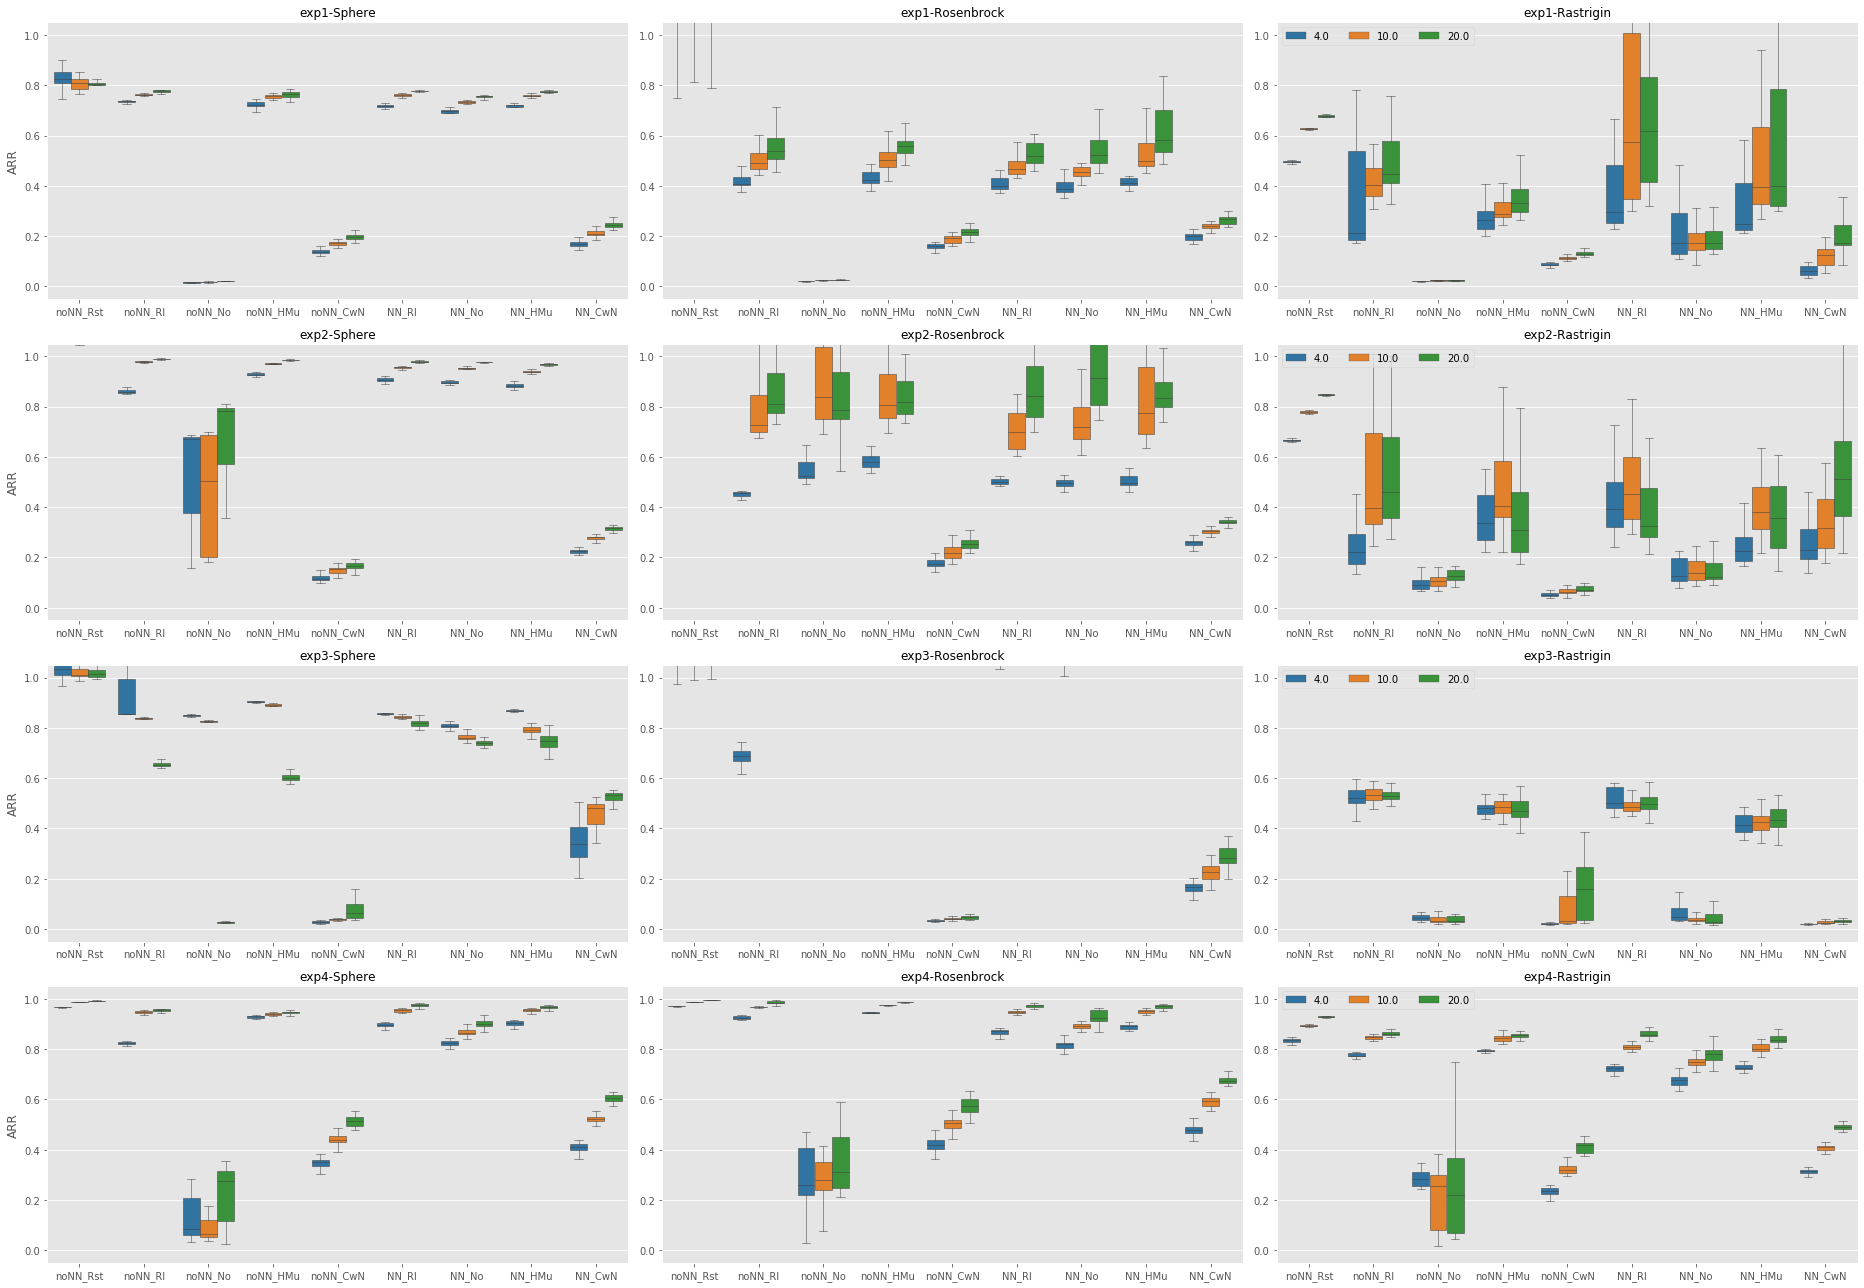

In [4]:
with plt.style.context('ggplot'):
    fig,axs = plot_all_vertical('arr', title_size=12, col_by_freq=True, col_palette='tab10')
    ax.grid(True)
    
# fig.savefig(path/'ARR.eps', dpi=400, format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


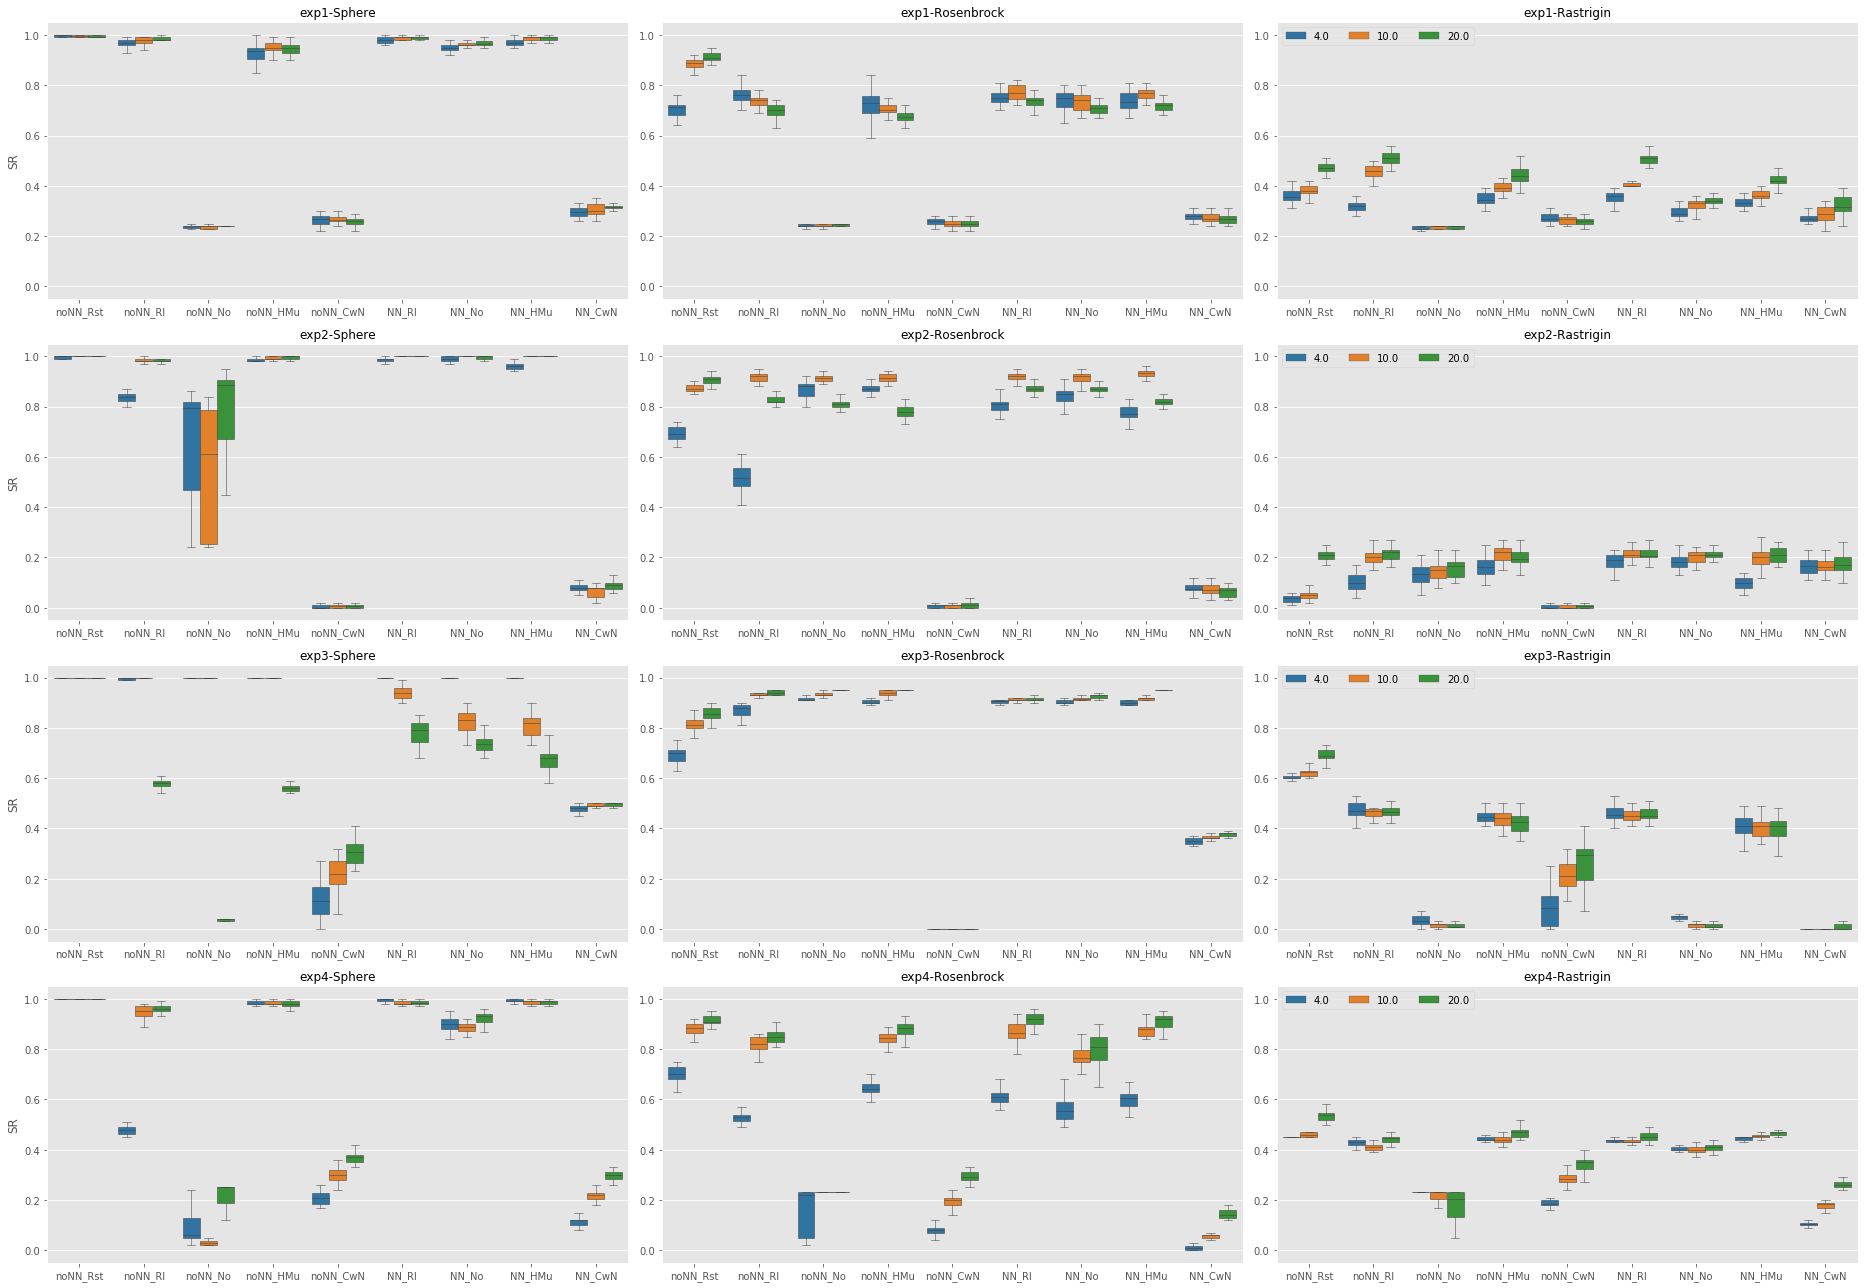

In [5]:
with plt.style.context('ggplot'):
    fig,axs = plot_all_vertical('sr', title_size=12, col_by_freq=True, col_palette='tab10')
    ax.grid(True)
    
fig.savefig(path/'SR.eps', dpi=400, format='eps')


In [6]:
#plot only some figures

In [30]:
def plot_two_horizontal(m, normalize=False, title_size=14, col_by_freq=col_by_freq, col_palette=col_palette, do_lim=True,
                        ll=0.2, ul=0.8):
    data = get_data(m, normalize=normalize)
    fig,axs= plt.subplots(1, 2, figsize=(14,6), sharex=False, sharey=False)#20,12
    func='sphere'
    for i,(ax,exp) in enumerate(zip(axs,['exp1','exp4'])):#
        first_exp = i==0
        #for j,ax in enumerate(axs):
        first_func = i==0
        test = data.query(f'experiment=={exp!r} and function=={func!r}').sort_values('method', ascending=False)
        plot_one(test, m, normalize=normalize, title=f'{exp}-{func.title()}', title_size=title_size, hide_x=False,
                 hide_y=not first_func, col_by_freq=col_by_freq, col_palette=col_palette, ax=ax,
                 do_lim=do_lim, ll=ll, ul=ul)
        
#     for axs in axss: 
        ax.legend(loc='upper right', ncol=3)
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(13)
            tick.label.set_rotation(45)
    plt.tight_layout()
    return fig,axs

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


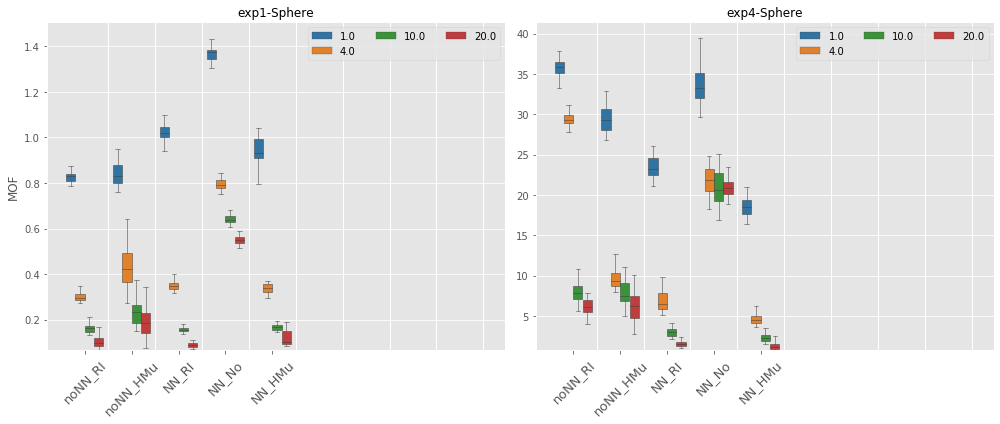

In [31]:
with plt.style.context('ggplot'):
    fig,axs = plot_two_horizontal('mof', title_size=12, col_by_freq=True, col_palette='tab10', do_lim=False, ll=0.2, ul=0.8)
    for ax in axs.flatten():
        ll,ul = ax.get_ylim()
        ax.set_ylim(ll*0.95, ul*1.05)
        for v in np.arange(9)+0.5: ax.axvline(v, c='white', ls='-', lw='1')
#         ax.grid(True)
    
fig.savefig(path/'MOFdetail.eps', dpi=400, format='eps')

In [33]:
def plot_full_horizontal(m, normalize=False, title_size=14, col_by_freq=col_by_freq, col_palette=col_palette, do_lim=True,
                        ll=0.2, ul=0.8):
    data = get_data(m, normalize=normalize)
    fig,axs= plt.subplots(1, 4, figsize=(14,4), sharex=False, sharey=False)#20,12
    func='sphere'
    for i,(ax,exp) in enumerate(zip(axs,['exp1','exp2','exp3','exp4'])):#
        first_exp = i==0
        #for j,ax in enumerate(axs):
        first_func = i==0
        test = data.query(f'experiment=={exp!r} and function=={func!r}').sort_values('method', ascending=False)
        plot_one(test, m, normalize=normalize, title=f'{exp}-{func.title()}', title_size=title_size, hide_x=False,
                 hide_y=not first_func, col_by_freq=col_by_freq, col_palette=col_palette, ax=ax,
                 do_lim=do_lim, ll=ll, ul=ul)
        
#     for axs in axss: 
        ax.legend(loc='upper right', ncol=3)
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(13)
            tick.label.set_rotation(45)
    plt.tight_layout()
    return fig,axs

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


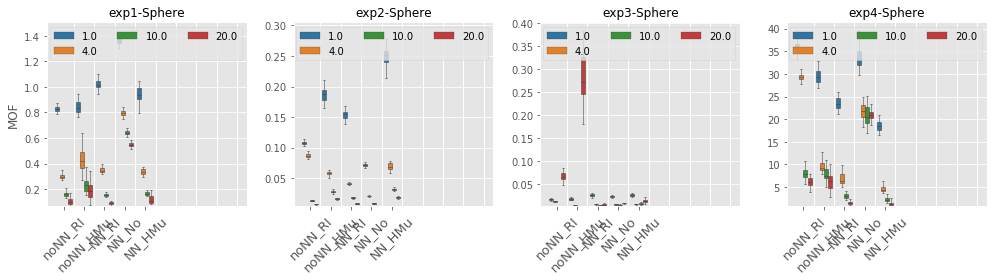

In [34]:
with plt.style.context('ggplot'):
    fig,axs = plot_full_horizontal('mof', title_size=12, col_by_freq=True, col_palette='tab10', do_lim=False, ll=0.2, ul=0.8)
    for ax in axs.flatten():
        ll,ul = ax.get_ylim()
        ax.set_ylim(ll*0.95, ul*1.05)
        for v in np.arange(9)+0.5: ax.axvline(v, c='white', ls='-', lw='1')
#         ax.grid(True)
    
fig.savefig(path/'MOFdetailfull.eps', dpi=400, format='eps')